QB Rating 
=========

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
ratings_df = pd.read_excel("QB Ratings.xlsx", sheet_name="QB Ratings Data")

In [3]:
ratings_df

,Player,Ranking,Team,Pos,Comp,Att,Pct,Att/G,Yds,Avg,Yds/G,TD,Int,1st,20+,40+,Sack,High Pay,Rating
0,Kurt Warner,10,ARI,QB,281,451,62.3,32.2,3417,7.6,244.1,27,17,167,44,5,20,1,89.8
1,Joey Harrington,21,ATL,QB,215,348,61.8,29.0,2215,6.4,184.6,7,8,100,26,2,32,0,77.2
2,Kyle Boller,24,BAL,QB,168,275,61.1,22.9,1743,6.3,145.2,9,10,90,19,4,24,0,75.2
3,Trent Edwards,29,BUF,QB,151,269,56.1,26.9,1630,6.1,163.0,7,8,81,21,4,12,0,70.4
4,Brian Griese,23,CHI,QB,161,262,61.5,37.4,1803,6.9,257.6,10,12,82,21,2,15,0,75.6
5,Rex Grossman,32,CHI,QB,122,225,54.2,28.1,1411,6.3,176.4,4,7,66,20,5,25,0,66.4
6,Carson Palmer,14,CIN,QB,373,575,64.9,35.9,4131,7.2,258.2,26,20,213,51,8,17,1,86.7
7,Derek Anderson,17,CLE,QB,298,527,56.5,32.9,3787,7.2,236.7,29,19,187,53,6,14,0,82.5
8,Tony Romo,5,DAL,QB,335,520,64.4,32.5,4211,8.1,263.2,36,19,215,55,11,24,1,97.4
9,Jay Cutler,12,DEN,QB,297,467,63.6,29.2,3497,7.5,218.6,20,14,175,41,7,27,1,88.1


In [4]:
# filter the dataframe with just the attributes
df = ratings_df.iloc[:32,4:]
df.head(5)

,Comp,Att,Pct,Att/G,Yds,Avg,Yds/G,TD,Int,1st,20+,40+,Sack,High Pay,Rating
0,281,451,62.3,32.2,3417,7.6,244.1,27,17,167,44,5,20,1,89.8
1,215,348,61.8,29.0,2215,6.4,184.6,7,8,100,26,2,32,0,77.2
2,168,275,61.1,22.9,1743,6.3,145.2,9,10,90,19,4,24,0,75.2
3,151,269,56.1,26.9,1630,6.1,163.0,7,8,81,21,4,12,0,70.4
4,161,262,61.5,37.4,1803,6.9,257.6,10,12,82,21,2,15,0,75.6


In [5]:
# Feature Target Split
# X is the variable that contains the features
X = df[['Comp', 'Att', 'Pct', 'Att/G', 'Yds', 'Avg', 'Yds/G', 'TD', 'Int',
       '1st', '20+', '40+', 'Sack']]

# y is the variable that contains the target
y = df['High Pay']

# Usually when we have larger dataset we split the data into training and testing sets
# But in this case we will use the entire dataset to train the model
# The code for training and testing is commented out below
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

In [6]:
# scaling the features
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
# incase of train test split you will have to scale both the train and test features.

y_test = [[250,417,60,32.1,2700,6.5,207.7,12,11,148,30,4,21]] # Jason Campbell features
y_test_scaled = scale.transform(y_test)

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Logistic Regression
===================


In [7]:
# model and fit the logistic regression model
model = LogisticRegression()
model.fit(X_scaled,y)

LogisticRegression()

In [8]:
# predict the class
predicted_class = model.predict(y_test_scaled)
print(predicted_class)   # 1 means high pay, 0 means low pay

[0]


In [9]:
model.predict_proba(y_test_scaled) # probability of the prediction being 0 or 1

array([[0.73032799, 0.26967201]])

In [10]:
# weight of the model
weights = model.coef_
print(weights)

# bias of the model
intercept = model.intercept_
print(intercept)

[[ 0.36872542  0.32086506  0.27625607 -0.41051788  0.19767547 -0.00296384
  -0.39607158  0.40778149  0.26877925  0.38707778  0.04879599  0.5763006
   0.08583097]]
[-0.2157415]


Random Forest
=============

In [32]:
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)
rf_classifier.fit(X_scaled, y)

RandomForestClassifier(n_estimators=2, random_state=42)

In [33]:
rf_predict = rf_classifier.predict(y_test_scaled)
rf_predict

array([0], dtype=int64)

In [34]:
rf_classifier.predict_proba(y_test_scaled)

array([[0.5, 0.5]])

Clustering
==========

In [50]:
from sklearn.cluster import KMeans

In [51]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X_scaled)

# extract the centroids
centroids = kmeans2.cluster_centers_
print("centroids",centroids)

# class labels based on training data
labels = kmeans2.labels_
print("labels",labels)

c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Babli Dey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


centroids [[-0.8258086  -0.84776697 -0.31196494 -0.57005627 -0.85192063 -0.52037295
  -0.69355753 -0.79095638 -0.56013032 -0.84052894 -0.83689185 -0.6237793
  -0.19363521]
 [ 0.93591641  0.96080256  0.35356027  0.64606378  0.96551004  0.58975601
   0.78603186  0.89641723  0.63481437  0.95259946  0.94847743  0.70694987
   0.21945324]]
labels [1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0]


In [ ]:
# predicting the class of the new data point
kmeans2.predict(y_test_scaled)

array([0])

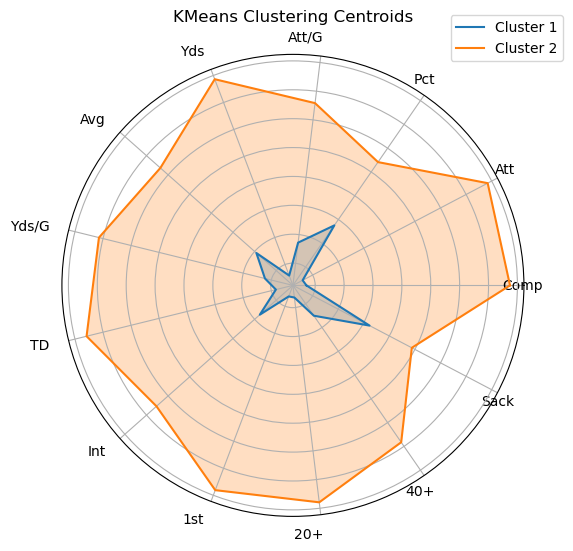

In [53]:
features = X.columns

# Function to plot radar chart
def plot_radar_chart(centroids, features):
    num_features = len(features)
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]  # Close the radar chart loop
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for i, centroid in enumerate(centroids):
        values = centroid.tolist() + [centroid[0]]  # Close the loop for the radar chart
        ax.plot(angles, values, label=f'Cluster {i+1}')
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticklabels([])  # Hide y-axis ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, rotation=45, ha='right')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title("KMeans Clustering Centroids")
    plt.show()

# Plot the radar chart
plot_radar_chart(centroids, features)

In [ ]:
y_true = y
y_pred = kmeans2.labels_

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.80
Recall: 0.80
F1 Score: 0.80


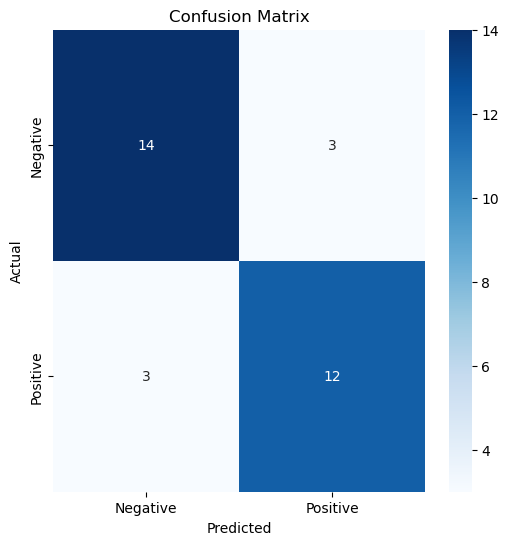

Confusion Matrix:
[[14  3]
 [ 3 12]]


In [64]:
cm = confusion_matrix(y_true, y_pred)
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)